<a href="https://colab.research.google.com/github/RishabhCalla/Fraud-Transaction-Detection-/blob/main/advance_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Fraud.csv'

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
# STEP 1: Install required libraries
!pip install xgboost -q

In [ ]:
# STEP 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# STEP 4: Basic preprocessing
# Drop columns not useful for model (like nameOrig, nameDest)
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:
# Encode 'type' column
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [ ]:
# STEP 5: Define features (X) and target (y)
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

In [ ]:
# STEP 6: Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# STEP 7: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [ ]:
# STEP 8: XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, max_depth=6, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [ ]:
# STEP 9: Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_true, y_pred))
    print(f"{model_name} Confusion Matrix:\n")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pinks')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.99      0.73      0.84      1643

    accuracy                           1.00   1272524
   macro avg       1.00      0.86      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

Random Forest Confusion Matrix:



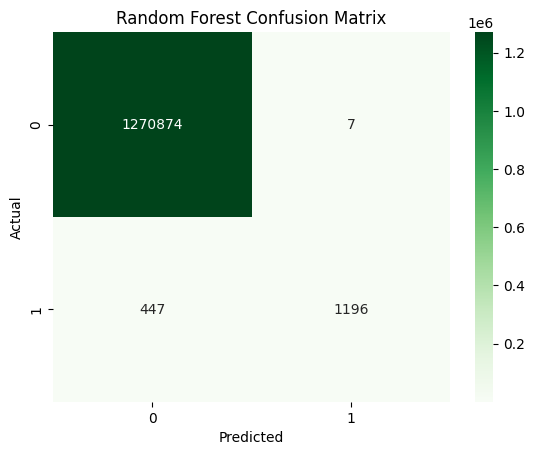

In [ ]:
# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")


XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.92      0.76      0.83      1643

    accuracy                           1.00   1272524
   macro avg       0.96      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

XGBoost Confusion Matrix:



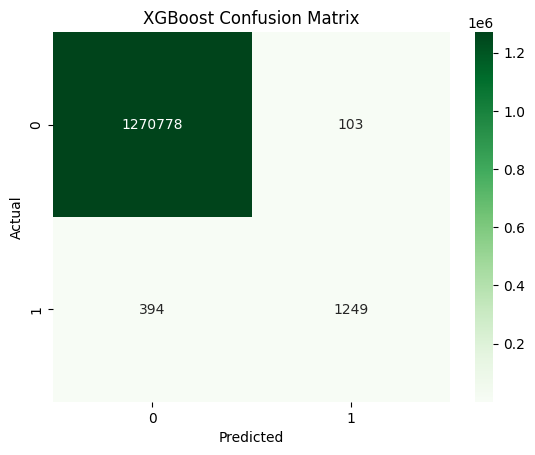

In [ ]:
# Evaluate XGBoost
evaluate_model(y_test, y_pred_xgb, "XGBoost")

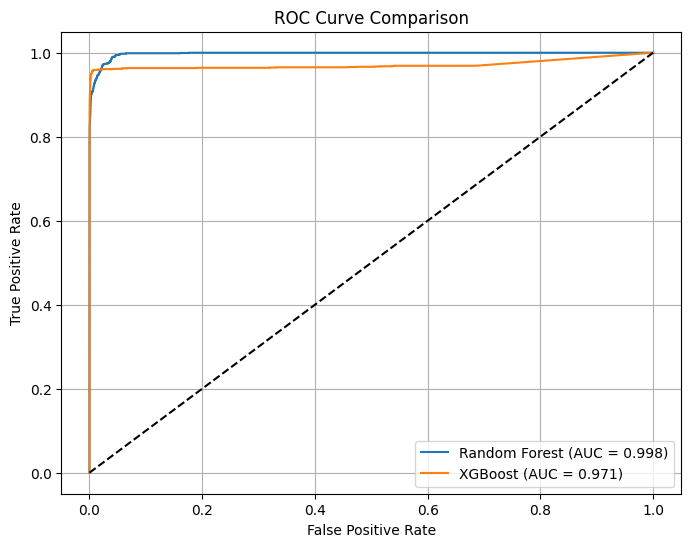

In [ ]:
# STEP 10: ROC Curve for comparison
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(8,6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.3f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

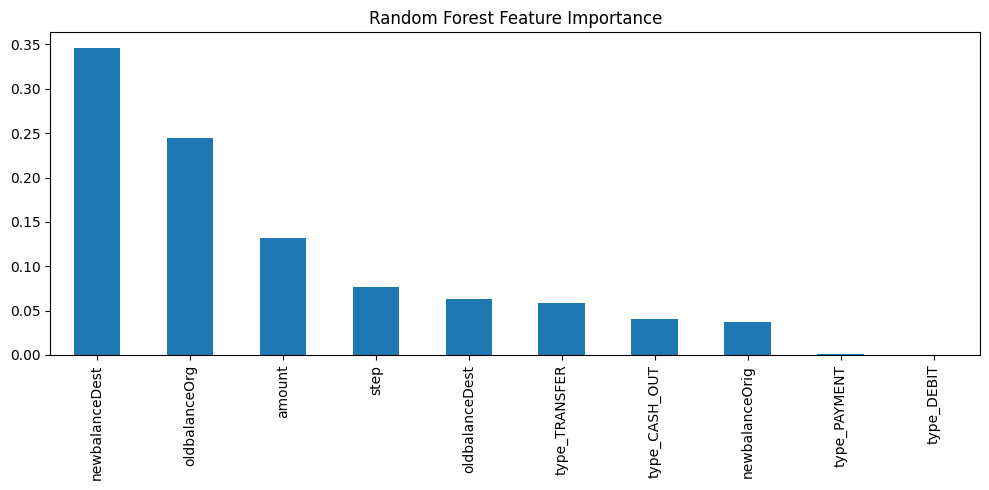

In [ ]:
# STEP 11: Feature Importances (Random Forest)
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_rf.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='Random Forest Feature Importance')
plt.tight_layout()
plt.show()

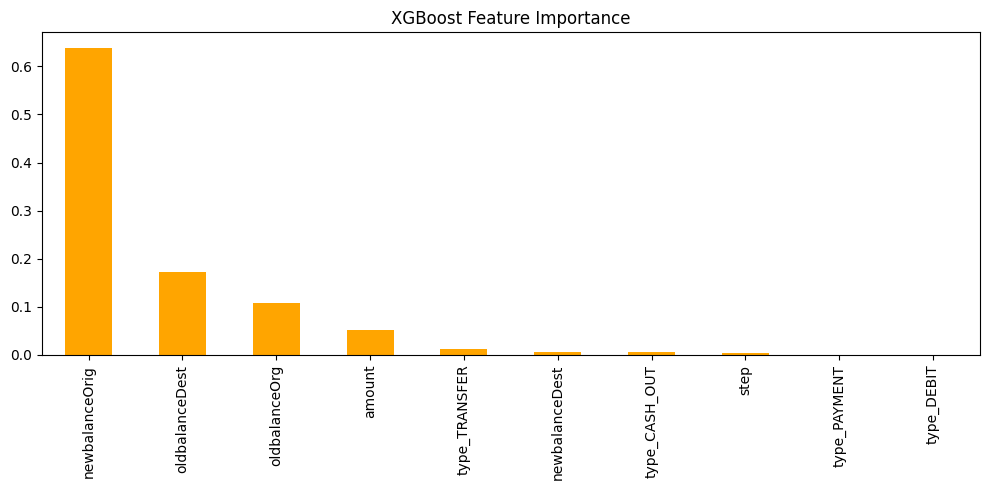

In [ ]:
# Feature Importances (XGBoost)
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
importances_xgb.sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='XGBoost Feature Importance', color='orange')
plt.tight_layout()
plt.show()

In [ ]:
# Take a sample of 10,000 rows for faster processing
X_sample = X.sample(n=10000, random_state=42)
y_sample = y.loc[X_sample.index]


In [ ]:
rf_cv = cross_val_score(rf, X_sample, y_sample, cv=3, scoring='roc_auc', n_jobs=-1)
xgb_cv = cross_val_score(xgb, X_sample, y_sample, cv=3, scoring='roc_auc', n_jobs=-1)

# Print scores
print(f"\nRandom Forest CV AUC: {rf_cv.mean():.4f}")
print(f"XGBoost CV AUC: {xgb_cv.mean():.4f}")


Random Forest CV AUC: 0.9416
XGBoost CV AUC: 0.9544
